In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
df = pd.read_csv('dataset.csv',low_memory=False)

In [49]:
df.sample(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
264530,2020-03-22,0.0,0.0,0.0,0.0,0.0,negative,No,male,Other
64827,2020-04-21,0.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other
203587,2020-04-01,0.0,0.0,0.0,0.0,0.0,negative,No,female,Other
198858,2020-04-02,0.0,0.0,0.0,0.0,0.0,negative,No,male,Other
215971,2020-03-31,0.0,1.0,0.0,0.0,0.0,negative,Yes,female,Abroad


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   test_date            278848 non-null  object 
 1   cough                278596 non-null  float64
 2   fever                278596 non-null  float64
 3   sore_throat          278847 non-null  float64
 4   shortness_of_breath  278847 non-null  float64
 5   head_ache            278847 non-null  float64
 6   corona_result        278848 non-null  object 
 7   age_60_and_above     151528 non-null  object 
 8   gender               259285 non-null  object 
 9   test_indication      278848 non-null  object 
dtypes: float64(5), object(5)
memory usage: 21.3+ MB


In [51]:
df['test_indication'].value_counts()

test_indication
Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: count, dtype: int64

In [52]:
df.isnull().mean() * 100

test_date               0.000000
cough                   0.090372
fever                   0.090372
sore_throat             0.000359
shortness_of_breath     0.000359
head_ache               0.000359
corona_result           0.000000
age_60_and_above       45.659284
gender                  7.015650
test_indication         0.000000
dtype: float64

In [53]:
cols = ['sore_throat','shortness_of_breath', 'head_ache']
df = df.dropna(subset=cols)

In [11]:
df.shape

(278847, 10)

In [54]:
df.duplicated().sum()

272207

In [55]:
# Working with test_date column
# Converting to datetime datatype
df['test_date'] = pd.to_datetime(df['test_date'])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278847 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   test_date            278847 non-null  datetime64[ns]
 1   cough                278596 non-null  float64       
 2   fever                278596 non-null  float64       
 3   sore_throat          278847 non-null  float64       
 4   shortness_of_breath  278847 non-null  float64       
 5   head_ache            278847 non-null  float64       
 6   corona_result        278847 non-null  object        
 7   age_60_and_above     151528 non-null  object        
 8   gender               259285 non-null  object        
 9   test_indication      278847 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 23.4+ MB


In [57]:
df['test_date_month'] = df['test_date'].dt.month_name()
df.sample(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,test_date_month
19715,2020-04-27,1.0,1.0,0.0,0.0,0.0,other,NaN,female,Abroad,April
144030,2020-04-11,0.0,0.0,0.0,0.0,0.0,negative,Yes,male,Other,April
23230,2020-04-27,0.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other,April
138154,2020-04-12,0.0,0.0,0.0,0.0,0.0,negative,Yes,female,Other,April
129447,2020-04-13,0.0,0.0,0.0,0.0,0.0,negative,No,male,Other,April


In [58]:
df['test_date_day'] = df['test_date'].dt.day
df.sample(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,test_date_month,test_date_day
156651,2020-04-09,0.0,0.0,0.0,0.0,0.0,negative,No,male,Other,April,9
87074,2020-04-19,0.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other,April,19
145712,2020-04-11,0.0,0.0,0.0,0.0,0.0,negative,Yes,female,Other,April,11
214764,2020-03-31,0.0,0.0,0.0,0.0,0.0,negative,No,female,Other,March,31
206428,2020-04-01,0.0,0.0,0.0,0.0,0.0,positive,No,female,Contact with confirmed,April,1


## Univariate Analysis

In [59]:
plt.figure(figsize=(5,5))
sns.countplot(df['corona_result'])
plt.show()

ValueError: could not convert string to float: 'negative'

<Figure size 500x500 with 0 Axes>

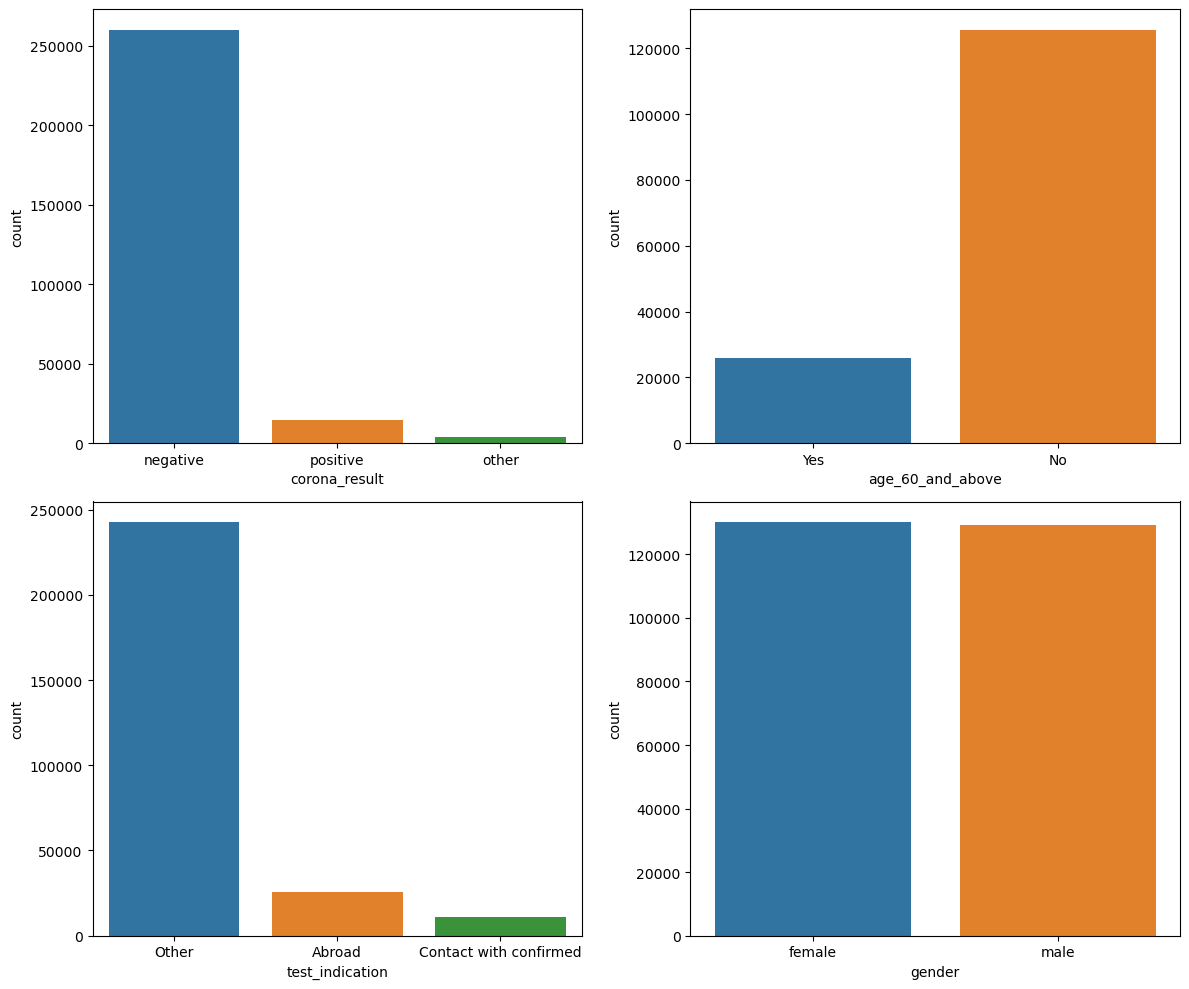

In [60]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Plot for Column1
plt.subplot(2, 2, 1)
sns.countplot(x='corona_result', data=df)

# Plot for Column2
plt.subplot(2, 2, 2)
sns.countplot(x='age_60_and_above', data=df)

# Plot for Column3
plt.subplot(2, 2, 3)
sns.countplot(x='test_indication', data=df)

# Plot for Column4
plt.subplot(2, 2, 4)
sns.countplot(x='gender', data=df)

# Show plot
plt.tight_layout()
plt.show()

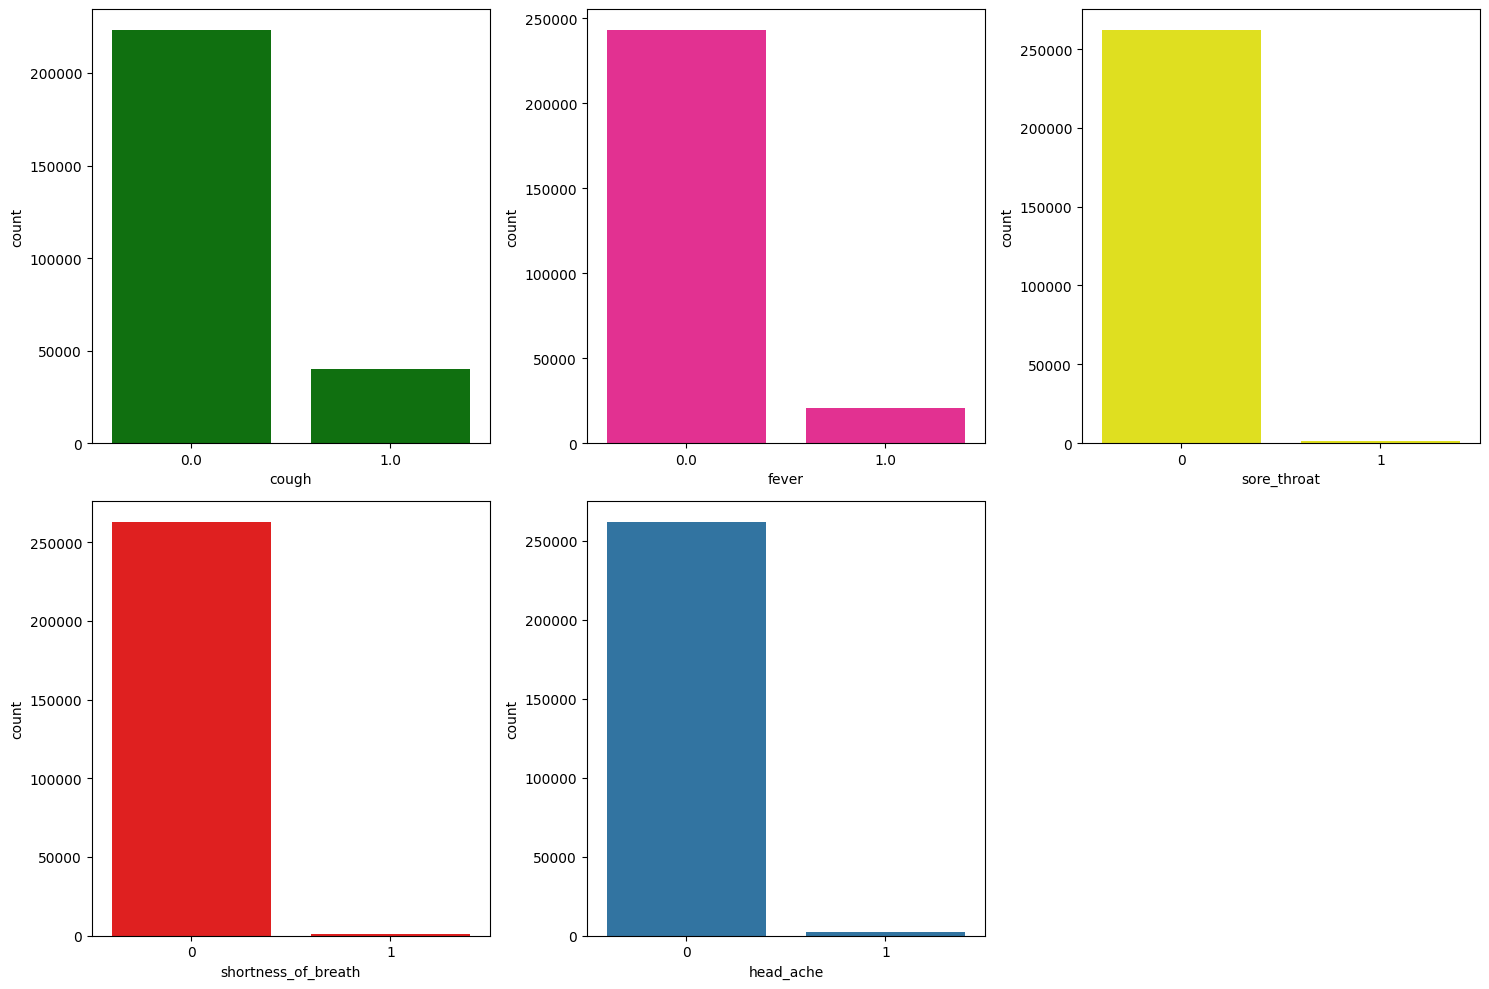

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot for Column1
plt.subplot(2, 3, 1)
sns.countplot(x='cough', data=df, color='green')

# Plot for Column2
plt.subplot(2, 3, 2)
sns.countplot(x='fever', data=df, color='deeppink')

# Plot for Column3
plt.subplot(2, 3, 3)
sns.countplot(x='sore_throat', data=df, color='yellow')

# Plot for Column4
plt.subplot(2, 3, 4)
sns.countplot(x='shortness_of_breath', data=df, color='red')

# Plot for Column5
plt.subplot(2, 3, 5)
sns.countplot(x='head_ache', data=df)

# Show plot
plt.tight_layout()
plt.show()

## Bivariate Analysis

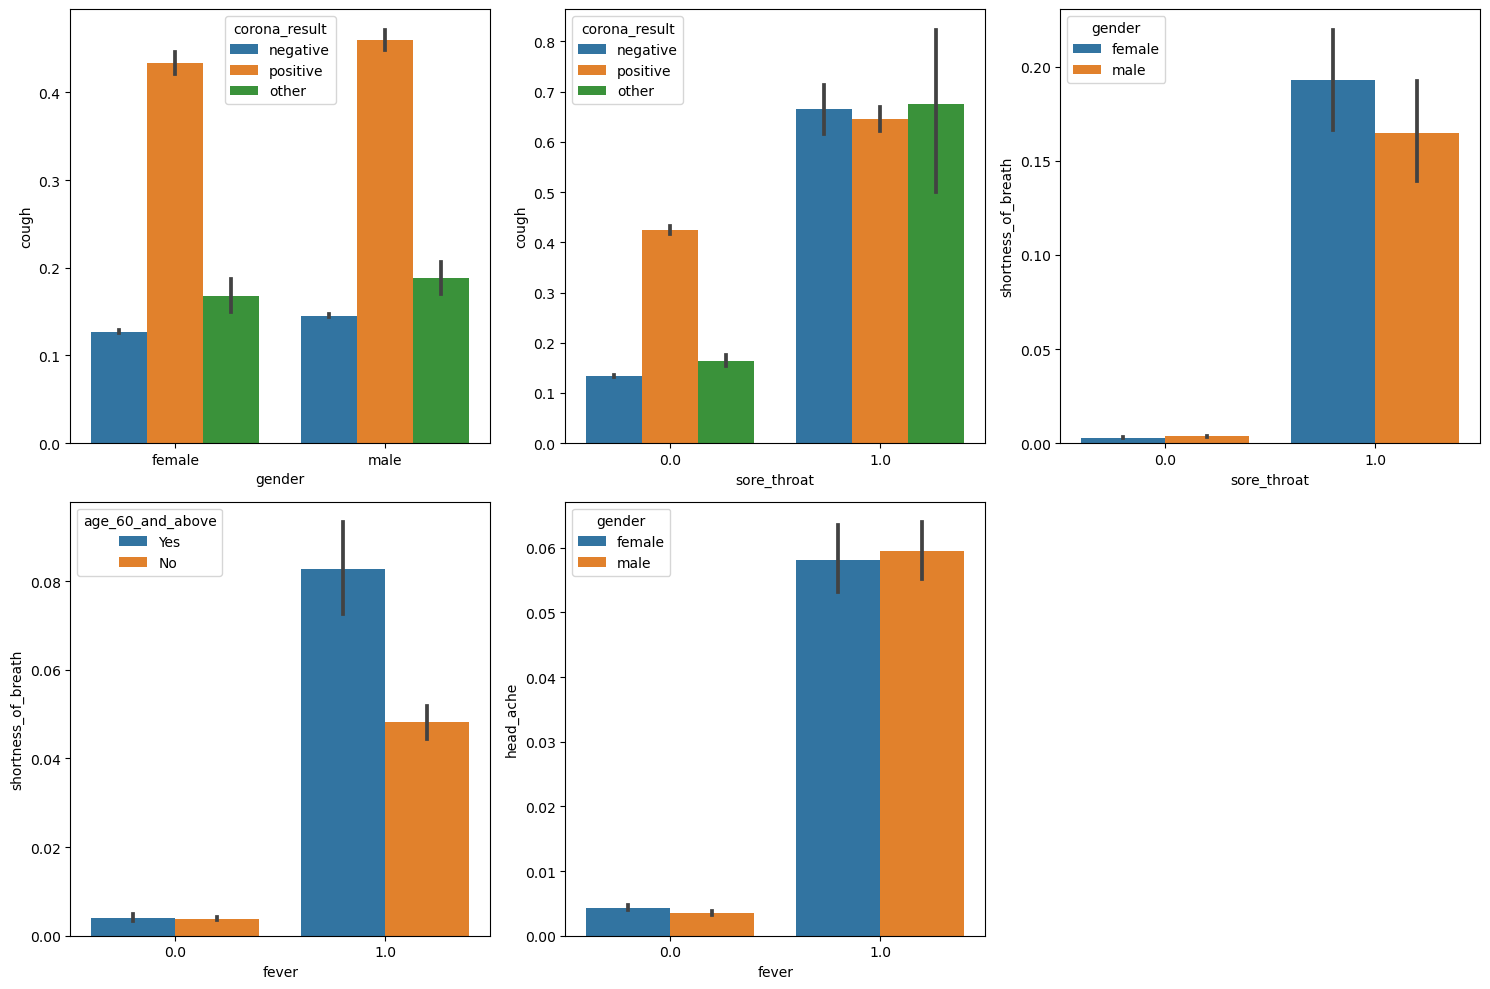

In [61]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot for Column1
plt.subplot(2, 3, 1)
sns.barplot(data=df, x='gender', y='cough' ,hue=df['corona_result'])

# Plot for Column2
plt.subplot(2, 3, 2)
sns.barplot(data=df, x='sore_throat', y='cough' ,hue=df['corona_result'])

# Plot for Column3
plt.subplot(2, 3, 3)
sns.barplot(data=df ,x='sore_throat', y='shortness_of_breath', hue=df['gender'])

# Plot for Column4
plt.subplot(2, 3, 4)
sns.barplot(data=df ,x='fever', y='shortness_of_breath', hue=df['age_60_and_above'])

# Plot for Column5
plt.subplot(2, 3, 5)
sns.barplot(data=df ,x='fever', y='head_ache', hue=df['gender'])

# Show plot
plt.tight_layout()
plt.show()

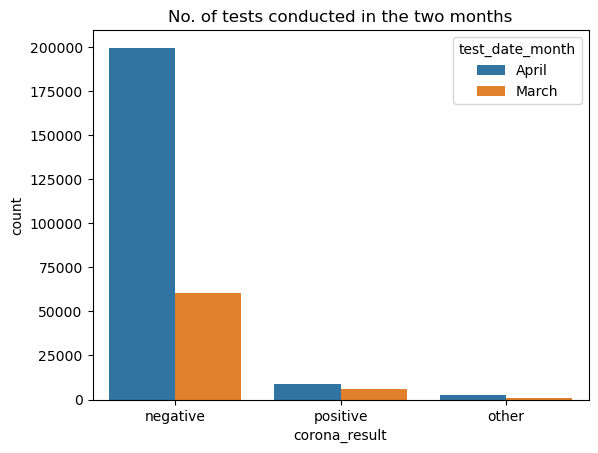

In [62]:
plt.title("No. of tests conducted in the two months")
sns.countplot(data=df, x='corona_result', hue='test_date_month')
plt.show()

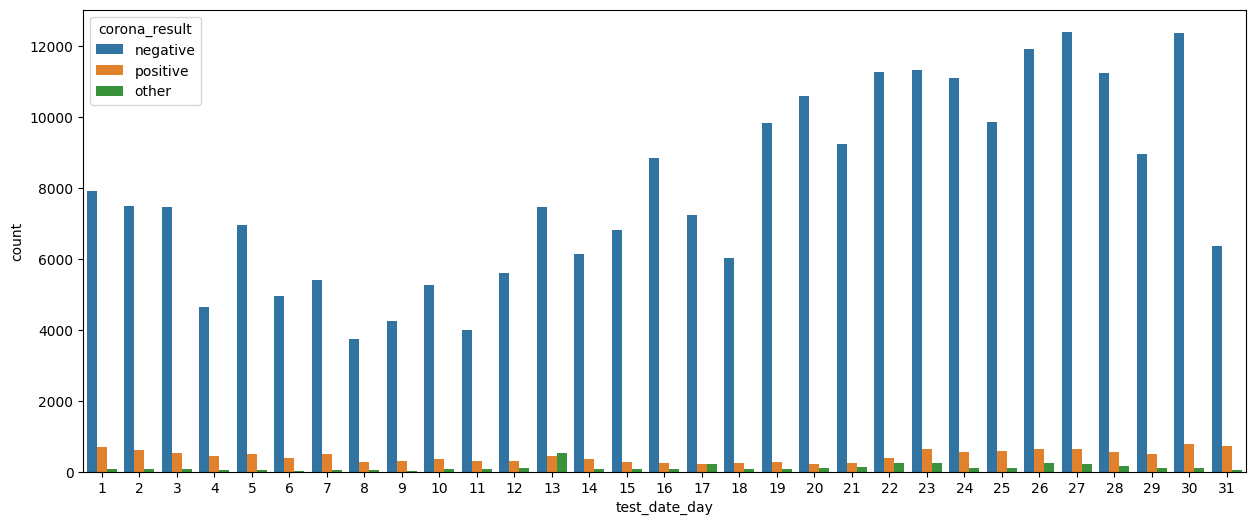

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='test_date_day', hue='corona_result')
plt.show()

## Train test split

In [63]:
from sklearn.model_selection import train_test_split

X = df
y = df['corona_result']

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [65]:
X_train

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,test_date_month,test_date_day
95011,2020-04-18,0.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other,April,18
149262,2020-04-10,0.0,0.0,0.0,0.0,0.0,negative,No,male,Other,April,10
170331,2020-04-06,1.0,0.0,0.0,0.0,0.0,negative,No,male,Abroad,April,6
21499,2020-04-27,0.0,0.0,0.0,0.0,0.0,negative,NaN,female,Other,April,27
234875,2020-03-28,0.0,0.0,0.0,0.0,0.0,negative,No,female,Other,March,28
...,...,...,...,...,...,...,...,...,...,...,...,...
33867,2020-04-25,0.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other,April,25
84434,2020-04-19,1.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other,April,19
95816,2020-04-18,0.0,0.0,0.0,0.0,0.0,negative,NaN,male,Other,April,18
203245,2020-04-01,0.0,0.0,0.0,0.0,0.0,negative,No,male,Other,April,1


## Handling Missing data

In [66]:
X_train['age_60_and_above_imputed'] = X_train['age_60_and_above']
X_test['age_60_and_above_imputed'] = X_test['age_60_and_above']

X_train['gender_imputed'] = X_train['gender']
X_test['gender_imputed'] = X_test['gender']

In [43]:
X_train.sample(5)

,test_date,sore_throat,shortness_of_breath,head_ache,test_indication,test_date_month,test_date_day,age_60_and_above,gender,cough,fever,age_60_and_above_imputed,gender_imputed
258770,2020-03-23,0.0,0.0,0.0,Other,March,23,No,male,0.0,0.0,No,male
79068,2020-04-20,0.0,0.0,0.0,Other,April,20,No,male,0.0,0.0,No,male
13105,2020-04-28,0.0,0.0,0.0,Other,April,28,No,female,0.0,0.0,No,female
244570,2020-03-26,0.0,0.0,0.0,Other,March,26,No,female,0.0,0.0,No,female
185685,2020-04-04,0.0,0.0,0.0,Other,April,4,No,male,0.0,0.0,No,male


In [67]:
X_train['age_60_and_above_imputed'][X_train['age_60_and_above_imputed'].isnull()] = X_train['age_60_and_above'].dropna().sample(X_train['age_60_and_above'].isnull().sum(), replace=True).values
X_test['age_60_and_above_imputed'][X_test['age_60_and_above_imputed'].isnull()] = X_train['age_60_and_above'].dropna().sample(X_test['age_60_and_above'].isnull().sum(), replace=True).values

X_train['gender_imputed'][X_train['gender_imputed'].isnull()] = X_train['gender'].dropna().sample(X_train['gender'].isnull().sum(), replace=True).values
X_test['gender_imputed'][X_test['gender_imputed'].isnull()] = X_train['gender'].dropna().sample(X_test['gender'].isnull().sum(), replace=True).values


/var/folders/z1/st_pddg10p751vw22gy_dx580000gn/T/ipykernel_93907/4002590267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['age_60_and_above_imputed'][X_train['age_60_and_above_imputed'].isnull()] = X_train['age_60_and_above'].dropna().sample(X_train['age_60_and_above'].isnull().sum(), replace=True).values
/var/folders/z1/st_pddg10p751vw22gy_dx580000gn/T/ipykernel_93907/4002590267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['age_60_and_above_imputed'][X_test['age_60_and_above_imputed'].isnull()] = X_train['age_60_and_above'].dropna().sample(X_test['age_60_and_above'].isnull().sum(), replace=

In [68]:
temp = pd.concat(
        [
            X_train['age_60_and_above'].value_counts() / len(X_train['age_60_and_above'].dropna()),
            X_train['age_60_and_above_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [46]:
temp

,original,imputed
No,0.829072,0.829072
Yes,0.170928,0.170928


In [69]:
temp = pd.concat(
        [
            X_train['gender'].value_counts() / len(X_train['gender'].dropna()),
            X_train['gender_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
female,0.502439,0.401453
male,0.497561,0.398545


In [29]:
X_train['cough_imputed'] = X_train['cough']
X_test['cough_imputed'] = X_test['cough']

X_train['cough_imputed'][X_train['cough_imputed'].isnull()] = X_train['cough'].dropna().sample(X_train['cough'].isnull().sum()).values
X_test['cough_imputed'][X_test['cough_imputed'].isnull()] = X_train['cough'].dropna().sample(X_test['cough'].isnull().sum()).values

/var/folders/z1/st_pddg10p751vw22gy_dx580000gn/T/ipykernel_93907/3394986770.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['cough_imputed'][X_train['cough_imputed'].isnull()] = X_train['cough'].dropna().sample(X_train['cough'].isnull().sum()).values
/var/folders/z1/st_pddg10p751vw22gy_dx580000gn/T/ipykernel_93907/3394986770.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['cough_imputed'][X_test['cough_imputed'].isnull()] = X_train['cough'].dropna().sample(X_test['cough'].isnull().sum()).values


In [70]:
X_train['fever_imputed'] = X_train['fever']
X_test['fever_imputed'] = X_test['fever']

X_train['fever_imputed'][X_train['fever_imputed'].isnull()] = X_train['fever'].dropna().sample(X_train['fever'].isnull().sum()).values
X_test['fever_imputed'][X_test['fever_imputed'].isnull()] = X_train['fever'].dropna().sample(X_test['fever'].isnull().sum()).values

/var/folders/z1/st_pddg10p751vw22gy_dx580000gn/T/ipykernel_93907/4294878389.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['fever_imputed'][X_train['fever_imputed'].isnull()] = X_train['fever'].dropna().sample(X_train['fever'].isnull().sum()).values
/var/folders/z1/st_pddg10p751vw22gy_dx580000gn/T/ipykernel_93907/4294878389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['fever_imputed'][X_test['fever_imputed'].isnull()] = X_train['fever'].dropna().sample(X_test['fever'].isnull().sum()).values


In [71]:
X_train.drop(['cough', 'fever', 'age_60_and_above', 'gender'], axis=1, inplace=True)
X_test.drop(['cough', 'fever', 'age_60_and_above', 'gender'], axis=1, inplace=True)

In [72]:
X_train.rename(columns={'age_60_and_above_imputed': 'age_60_and_above', 'gender_imputed': 'gender', 'cough_imputed' : 'cough', 'fever_imputed' : 'fever'}, inplace=True)
X_test.rename(columns={'age_60_and_above_imputed': 'age_60_and_above', 'gender_imputed': 'gender', 'cough_imputed' : 'cough', 'fever_imputed' : 'fever'}, inplace=True)

In [73]:
X_train.drop('corona_result', axis=1, inplace=True)
X_test.drop('corona_result', axis=1, inplace=True)

In [74]:
X_train.isnull().mean() * 100

test_date              0.0
sore_throat            0.0
shortness_of_breath    0.0
head_ache              0.0
test_indication        0.0
test_date_month        0.0
test_date_day          0.0
age_60_and_above       0.0
gender                 0.0
fever                  0.0
dtype: float64

## Encoding on categorical columns

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(y_train)

LabelEncoder()

In [81]:
le.classes_

array([0, 1, 2])

In [82]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [83]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(sparse=False,drop='first'),['age_60_and_above','gender','test_indication','test_date_month'])
],remainder='passthrough')

In [84]:
# Fit and transform on the training data
X_train_encoded = transformer.fit_transform(X_train)

# Transform the test data
X_test_encoded = transformer.transform(X_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [85]:
# Convert the transformed training data array to a DataFrame
X_train = pd.DataFrame(X_train_encoded, columns=transformer.get_feature_names_out())

# Convert the transformed test data array to a DataFrame
X_test = pd.DataFrame(X_test_encoded, columns=transformer.get_feature_names_out())

In [86]:
X_train.drop('remainder__test_date', axis=1, inplace=True)
X_test.drop('remainder__test_date', axis=1, inplace=True)

In [87]:
X_test.isnull().mean()*100

tnf1__age_60_and_above_Yes                      0.0
tnf1__gender_male                               0.0
tnf1__test_indication_Contact with confirmed    0.0
tnf1__test_indication_Other                     0.0
tnf1__test_date_month_March                     0.0
remainder__sore_throat                          0.0
remainder__shortness_of_breath                  0.0
remainder__head_ache                            0.0
remainder__test_date_day                        0.0
remainder__fever                                0.0
dtype: float64

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9550833781603012


In [89]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Initialize the ANN classifier
ann_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Training the classifier on the training data
ann_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_ann = ann_classifier.predict(X_test)

# Calculating accuracy
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print("Accuracy - ANN:", accuracy_ann)


Accuracy - ANN: 0.9550654473731397


In [90]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Training the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_dt = dt_classifier.predict(X_test)

# Calculating accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy - Decision Tree:", accuracy_dt)


Accuracy - Decision Tree: 0.9543482158866774


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression classifier
logistic_classifier = LogisticRegression(random_state=42)

# Training the classifier on the training data
logistic_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_logistic = logistic_classifier.predict(X_test)

# Calculating accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy - Logistic Regression:", accuracy_logistic)


Accuracy - Logistic Regression: 0.9503089110412007


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Training the classifier on the training data
gb_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = gb_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9550475165859781


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Initialize the ANN classifier with more hidden layers
ann_classifier = MLPClassifier(hidden_layer_sizes=(100, 50, 20), max_iter=1000, random_state=42)

# Training the classifier on the training data
ann_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_ann = ann_classifier.predict(X_test)

# Calculating accuracy
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print("Accuracy - ANN with more layers:", accuracy_ann)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Accuracy - ANN with more layers: 0.9575863245271576


In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_curve, confusion_matrix, classification_report

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision-Recall Curve (for binary classification only)
# precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.9550833781603012

Confusion Matrix:
[[51566     3   455]
 [  767     1    40]
 [ 1233     7  1698]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     52024
           1       0.09      0.00      0.00       808
           2       0.77      0.58      0.66      2938

    accuracy                           0.96     55770
   macro avg       0.61      0.52      0.55     55770
weighted avg       0.94      0.96      0.95     55770



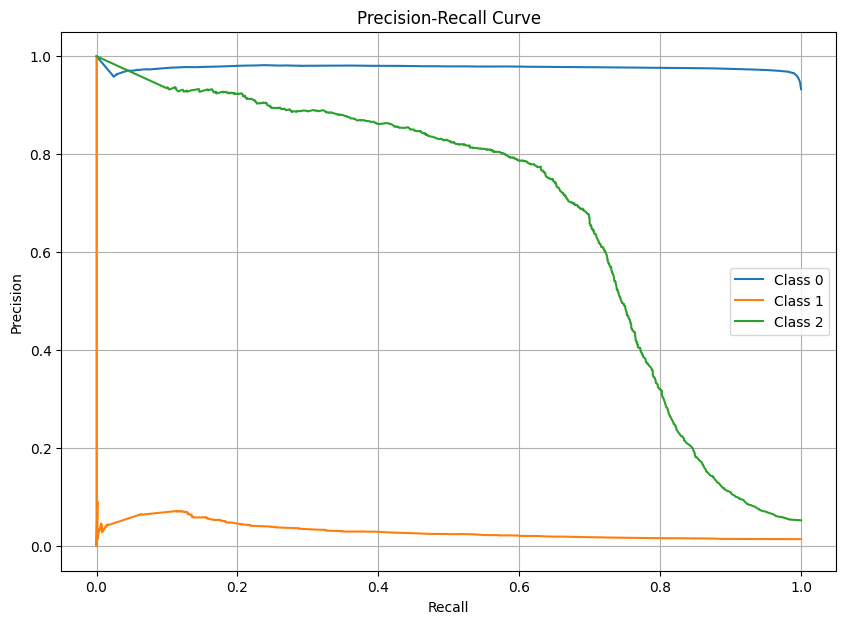

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Convert y_test and y_pred to binary form
y_test_binary = label_binarize(y_test, classes=rf_classifier.classes_)
y_pred_binary = rf_classifier.predict_proba(X_test)

# Compute precision-recall pairs for each class
precision = dict()
recall = dict()
thresholds = dict()
for i in range(len(rf_classifier.classes_)):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_test_binary[:, i], y_pred_binary[:, i])

# Plot precision-recall curve for each class
plt.figure(figsize=(10, 7))
for i in range(len(rf_classifier.classes_)):
    plt.plot(recall[i], precision[i], label=f"Class {i}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


In [93]:
from sklearn.metrics import precision_recall_curve, confusion_matrix, classification_report

# Calculating accuracy
accuracy_ann = accuracy_score(y_test, y_pred_ann)
print("Accuracy - ANN:", accuracy_ann)

# Precision-Recall Curve (for binary classification only)
# precision_ann, recall_ann, _ = precision_recall_curve(y_test, y_pred_ann)

# Confusion Matrix
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)
print("\nConfusion Matrix - ANN:")
print(conf_matrix_ann)

# Classification Report
class_report_ann = classification_report(y_test, y_pred_ann)
print("\nClassification Report - ANN:")
print(class_report_ann)


Accuracy - ANN: 0.9550654473731397

Confusion Matrix - ANN:
[[51553     0   471]
 [  770     0    38]
 [ 1227     0  1711]]

Classification Report - ANN:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     52024
           1       0.00      0.00      0.00       808
           2       0.77      0.58      0.66      2938

    accuracy                           0.96     55770
   macro avg       0.58      0.52      0.55     55770
weighted avg       0.94      0.96      0.95     55770



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


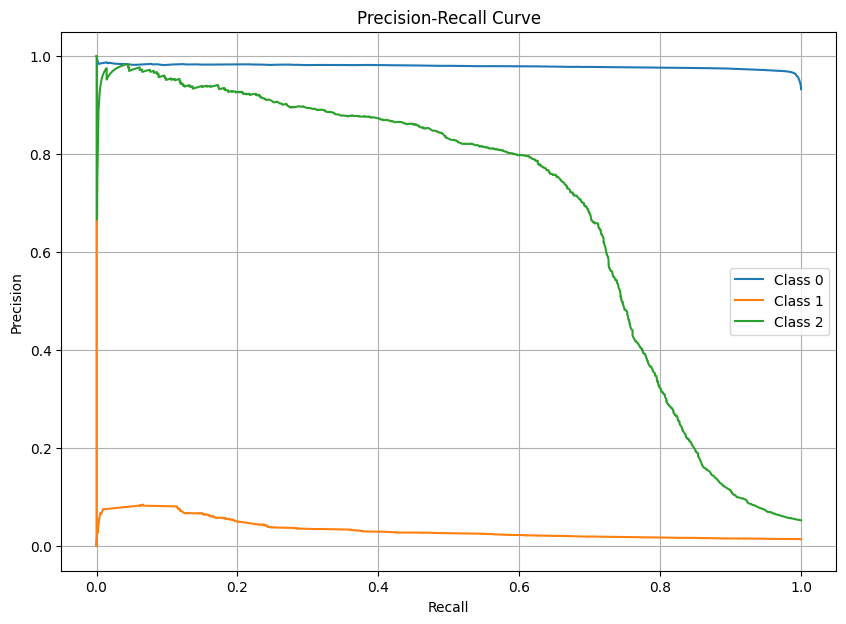

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Convert y_test and y_pred to binary form
y_test_binary = label_binarize(y_test, classes=rf_classifier.classes_)
y_pred_binary = gb_classifier.predict_proba(X_test)

# Compute precision-recall pairs for each class
precision = dict()
recall = dict()
thresholds = dict()
for i in range(len(rf_classifier.classes_)):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_test_binary[:, i], y_pred_binary[:, i])

# Plot precision-recall curve for each class
plt.figure(figsize=(10, 7))
for i in range(len(rf_classifier.classes_)):
    plt.plot(recall[i], precision[i], label=f"Class {i}")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()